In [28]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('/newhome/tntq/Trang/CityofZurich_traffic/data_qgis/out10.csv', encoding='latin-1')

In [3]:
df["DTV4"] = df["DTV_PKW"]+df["DTV_SNF"]+df["DTV_KRMR"]+df["DTV_LBus"]

In [4]:
#convert a Categorical column to its numerical codes
df2 = df['SpeedLimit'].replace(to_replace={30: 1, 35:2, 50: 3, 60: 4, 80: 5}
                         , regex=True)
df["SL2"] = df2
df

,Unnamed: 0,lat,lon,AnzFahrzeu,RoadType,SpeedLimit,DTV_PKW,DTV_SNF,DTV_KRMR,DTV_LBus,DTV_Trolle,ZSName,Achse,Kname,DTV4,SL2
0,6,47.346872,8.520489,138.44,2.0,60.0,10977.548828,604.571777,432.587860,0.000000,0.0,Allmendstrasse (Brunau),Allmendstrasse Ost,A3 Allmendstr,12014.708466,4.0
1,7,47.346945,8.520352,296.76,2.0,60.0,11654.000000,307.000000,197.000000,21.279999,0.0,Allmendstrasse (Brunau),Allmendstrasse Ost,A3 Allmendstr,12179.279999,4.0
2,8,47.347000,8.520230,339.56,2.0,60.0,17131.000000,744.000000,254.000000,0.000000,0.0,A3W (A4 Uetlibergtunnel Brunau),A3W (A4),A3 Allmendstr,18129.000000,4.0
3,9,47.347051,8.520121,403.28,2.0,80.0,20179.000000,870.000000,298.000000,0.000000,0.0,A3W (Chur Brunau),A3W,A3 Allmendstr,21347.000000,5.0
4,10,47.347111,8.520002,365.44,2.0,80.0,11620.000000,388.000000,195.000000,21.279999,0.0,Allmendstrasse (Brunau),Allmendstrasse West,A3 Allmendstr,12224.279999,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,187,47.370182,8.524943,755.56,1.0,30.0,25571.330078,1231.846802,912.713318,0.000000,0.0,Schimmelstrasse (Werdstrasse),Schimmelstrasse,Schimmel-/Werdstr (Schulweg),27715.890198,1.0
158,188,47.370596,8.535352,249.48,4.0,50.0,17030.250000,521.646179,422.380615,0.000000,0.0,Talstrasse (Pelikanstrasse),Talstrasse,Pelikan-/Talstr (Schulweg),17974.276794,3.0
159,189,47.374430,8.482958,112.44,4.0,30.0,7304.727539,280.524689,211.804047,0.000000,0.0,Albisriederstrasse (Lyrenweg),Albisriederstrasse,Albisriederstr/Lyrenweg,7797.056274,1.0
160,190,47.397185,8.503002,93.68,4.0,30.0,9498.923828,275.953918,225.097275,0.000000,0.0,Am Wasser (Hardeggstrasse),Am Wasser,Am Wasser 79,9999.975021,1.0


In [5]:
#define predictor and response variables
data = df[['AnzFahrzeu', 'RoadType', 'SpeedLimit', 'DTV4', "SL2"]]
X = data[['RoadType', 'DTV4', "SL2"]]
y = data["AnzFahrzeu"]

In [8]:
# Splitting the X and Y into the
# Training set and Testing set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [10]:
#Feature Scaling

#Doing the pre-processing part on training and 
#testing set such as fitting the Standard scale.
sc = StandardScaler()

x_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
#Applying PCA function
#Applying the PCA function into training and testing set for analysis.
# Applying PCA function on training
# and testing set of X component
pca = PCA(n_components = 2)

x_train = pca.fit_transform(x_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

In [32]:
#Fitting Logistic Regression To the training set
#regr = linear_model.LinearRegression()
#regr.fit(X, y)
classifier = linear_model.LinearRegression()
classifier.fit(x_train, y_train)
#fit(x_train, y_train)
print(classifier)

LinearRegression()


In [33]:
# Predicting the test set result using predict function under Regression
Y_prediction = classifier.predict(X_test)
print(Y_prediction)

[ 94.52956914  54.66620838  71.34506553 264.70791112 302.36137068
 344.57510709 236.87028318 153.76308516 338.49434417 129.33602765
  62.89804364 275.81184479 433.08997601 275.48547007 185.29207935
  58.80114593 114.05623005 167.79437158 129.91908335 415.66617133
 197.6543165   90.99568253 191.54636363 265.02207904 118.32440392
 124.89058053 248.89976252 155.37606706 224.35332308 245.02498243
  26.89242644 156.25632628 165.1945629   71.34506553 179.20685296
 249.3389297  147.75733662 201.50623451 155.37606706 119.52294952
 269.31921583 156.25632628 492.80295199 344.57510709 249.3389297
 153.34479716 224.35332308 433.08997601 129.33602765]


In [41]:
rmse = mean_squared_error(y_test, Y_prediction)
r2 = r2_score(y_test, Y_prediction)

In [43]:
r2

0.40405073451914975

In [25]:
# making confusion matrix between
# test set of Y and predicted value.
co_mat = confusion_matrix(y_test, Y_prediction)

ValueError: continuous is not supported

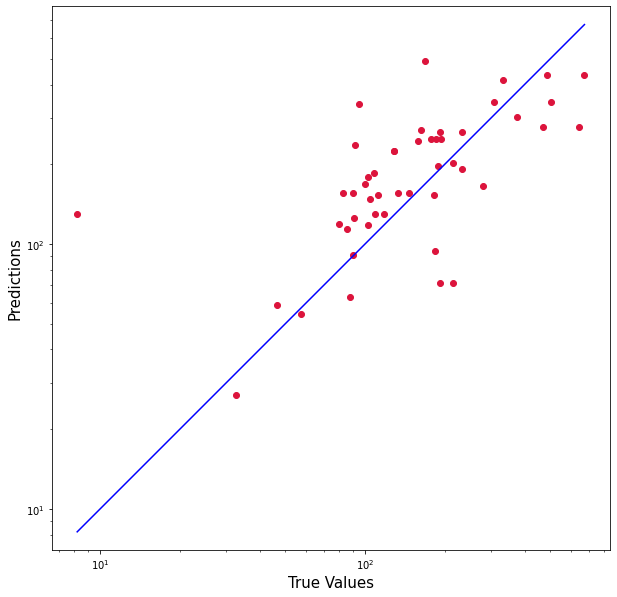

In [40]:
#plot bw y_test and Y_prediction
plt.figure(figsize=(10,10))
plt.scatter(y_test, Y_prediction, c='crimson')
r_squared = r2_score(y_test, Y_prediction)
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_prediction), max(y_test))
p2 = min(min(Y_prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.annotate("r-squared = {:.3f}".format(r_squared), (0, 1))
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

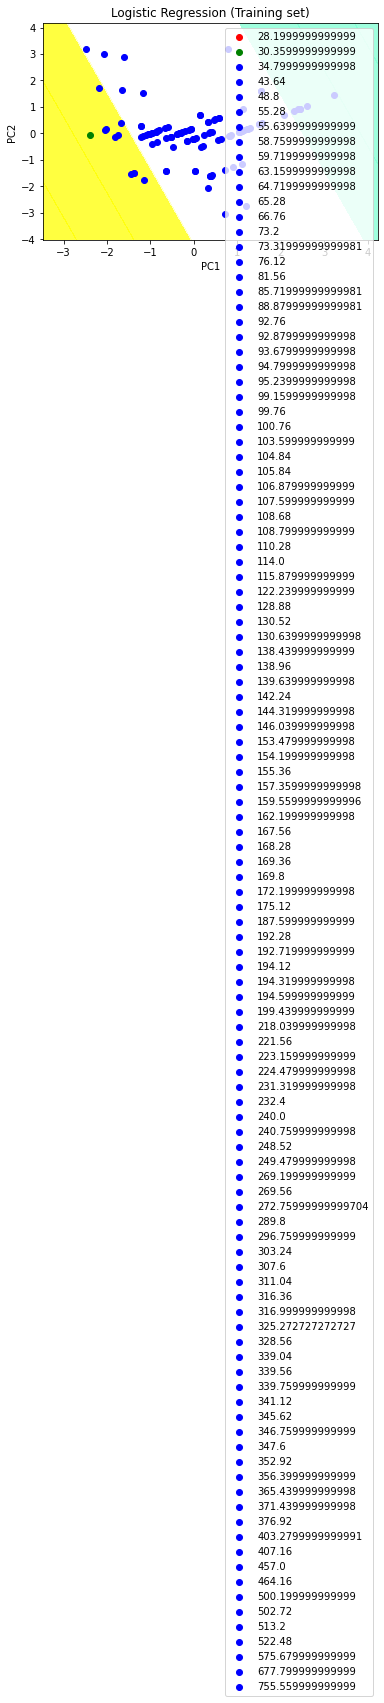

In [46]:
# Predicting the training set result through scatter plot
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1,
stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
    c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend

# show scatter plot
plt.show()